# Machine Learning Classification Project

DESCRIPTON
----------

This dataset is composed of 1300 samples with 31 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 5 possible values for the labels. The remaining columns are numeric
features, except for the last column which is categorical (with 3 categories).

Notice that the classes are unbalanced: some labels are more frequent than
others. You need to decide whether to take this into account, and if so how.

Your task is the following: you should compare the performance of Logistic
Regression (implemented by sklearn.linear_model.LogisticRegression) with that of
a Random Forest (implemented by sklearn.ensemble.ExtraTreesClassifier). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

As noted from the description above, we have a dataset of 1300 samples with 31 features each, including a column containing categorical data. Our task is to perform a classification analysis on this dataset comparing two main algorithms - Logistic Regression & Random Forest. Our pipeline will compose of the following key stages: 

1) Importing the relevant libraries and the main dataset.

2) Data Preprocessing (where we will ensure we don't have any missing data, encode our categorical features and perform feature scaling).

3) Implementation of the classification algorithm and base model - Logistic Regression.

4) Evaluation of the first base model - applying K-Fold Cross Validation.

5) Implemention of the second classification algorithm (Random Forest)

6) Evaluation of the second model - applying K-Fold Cross Validation.

7) Applying Grid-Search to find the most optimal set of parameters. 

9) Further application of techniques to optimize both models.

10) Final selection of the most optimal model and conclusion of analysis.



## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Importing the Dataset 

In [2]:
os.chdir('/Users/aryan/Desktop/mldata_0013072150') 
dataset = pd.read_csv('mldata_0013072150.csv')
dataset = dataset.drop("Unnamed: 0", axis=1) #To remove the "Unnamed: 0" column to make the table more readable. 
dataset.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1
0,4,-0.623405,1.157472,0.978446,3.951788,0.918710,-0.742102,-1.764838,1.959709,-0.430550,...,1.245197,-0.349880,1.193921,-1.764838,-0.030706,-1.376937,-0.876525,-1.303575,-0.685853,C
1,1,-3.017604,0.962947,1.971217,-2.183554,-2.475973,-4.056342,0.148193,0.529200,-0.692605,...,-0.266497,1.327070,1.646004,0.148193,-4.494677,-0.890755,-0.290291,-0.411538,-2.506186,A
2,1,-1.814985,-2.619374,-0.777541,1.921058,-0.550762,1.097364,0.453402,0.426274,1.081457,...,-1.147455,-0.289827,0.043222,0.453402,1.512044,0.193947,0.273527,0.191259,-0.336440,A
3,3,0.253860,0.276528,1.124507,-0.522192,1.223016,-0.521033,1.267149,0.400720,-0.480437,...,-0.490817,0.365089,-0.612431,1.267149,0.385040,-0.317562,0.570157,0.224122,0.808667,B
4,4,-1.119872,0.293963,0.421747,4.960528,-1.371113,-1.611126,-0.271988,3.291267,0.329875,...,1.838477,1.946403,0.495256,-0.271988,-1.412096,0.891830,1.858374,0.998611,0.720807,C


Only judging by the first five rows, we can already notice by the "label" column, that this is not a binary classification problem. Thus, we will use the groupby() method to check how many classes we actually have and the number of instances of each class in order to check if our classes are balanced. 

In [3]:
dataset.groupby('label').size()

label
0    280
1    458
2     94
3    188
4    280
dtype: int64

Clearly, we have unbalanced classes. Just from raw examination, it seems like the class with the label '1' is the majority class. For now, we note this observation and progress to the Data Preprocessing stage!

## Data Preprocessing

First of all, we need to ensure if we have any missing data as this can cause problems further down the pipeline, resulting in unwanted problems.

In [4]:
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows 

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1


No missing data. So we're all good. Now we will be diverge from pandas and use numpy to work with arrays in order to implement our Machine Learning Algorithms.

In [5]:
X = dataset.iloc[:, 1:32].values #Create an array of features where we drop the labels 
y = dataset.iloc[:, 0].values  #Labels

### Encoding Categorical features

We noticed that we have a categorical feature in our dataset. Thus, we will now decide to encode it so our ML models can perform with any issues and errors. We will use one-hot encoding which is one of the most popular methods to encode categorical features, especially since it our categories are not ordinal. One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data. Let's work through this now.

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [30])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 ... -0.8765252622477462 -1.303574775109286
  -0.6858526551788927]
 [1.0 0.0 0.0 ... -0.2902906528139364 -0.4115378456929173
  -2.506186182487661]
 [1.0 0.0 0.0 ... 0.2735273334152696 0.19125933115667776
  -0.33644020270983244]
 ...
 [0.0 0.0 1.0 ... -0.24697382697675335 -0.0034428330797955787
  0.7617113553888454]
 [0.0 0.0 1.0 ... -0.5985941843379471 1.9769820045028088
  0.5074231017644218]
 [0.0 0.0 1.0 ... -0.32010412324815474 0.8177409675901581
  -1.2747425297267416]]


Our Categorical features are now encoded. "A" is now represented by the vector (1, 0, 0), "B" is now (0, 1, 0) and "C" is now  (0, 0, 1) !

### Checking for Multicollinearity

Before we proceed to split our data into the training set and the test set, we need to ensure that there is no multicollinearity in our data. We shall use the df.corr() plot to show how the features might be correlated and thus possibily drop some columns contributing to multicollinearity.

In [7]:
correlations = dataset.corr()
pd.set_option('display.max_columns', None)
correlations

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
label,1.000000,0.009661,0.000082,-0.027292,0.017680,0.360908,-0.094833,0.084037,-0.080787,-0.010207,-0.032810,0.026852,0.022983,0.160865,-0.017670,0.009823,0.024836,0.122280,-0.012269,-0.003363,-0.053276,-0.040523,-0.001074,0.000528,0.018410,0.084037,-0.058086,0.030414,0.009650,0.026621,-0.003906
feature_1,0.009661,1.000000,0.082878,-0.038198,-0.471815,-0.085322,0.072784,0.038568,-0.158132,0.011850,-0.181452,0.040107,-0.072106,-0.067078,-0.045982,0.025476,0.029398,0.161614,0.024459,-0.016112,-0.018215,-0.037149,0.013212,0.037594,-0.022834,0.038568,0.492418,0.010559,0.027984,0.002332,0.000516
feature_2,0.000082,0.082878,1.000000,-0.029789,-0.021847,-0.016171,0.045615,-0.009897,-0.012176,0.034957,-0.000694,-0.001931,-0.022025,-0.007911,-0.027852,-0.023145,-0.020522,0.020464,0.016920,-0.071019,0.015169,0.006483,0.005106,-0.023536,0.053293,-0.009897,0.060571,0.005836,0.011006,-0.051986,-0.021119
feature_3,-0.027292,-0.038198,-0.029789,1.000000,-0.038485,-0.039121,-0.038413,0.034297,-0.002464,-0.025788,-0.057455,0.013345,-0.017914,-0.026312,0.033561,-0.025041,0.002794,-0.029453,0.046700,0.008337,0.015141,-0.028417,-0.013685,0.001060,-0.020110,0.034297,-0.054942,0.047069,0.012964,0.022155,0.004874
feature_4,0.017680,-0.471815,-0.021847,-0.038485,1.000000,0.367359,0.365658,-0.552903,0.259633,0.039210,0.520221,-0.008051,0.024800,0.325152,0.046668,0.029024,-0.038475,-0.494866,-0.004106,0.039993,-0.004260,0.040065,-0.038504,-0.008045,0.025285,-0.552903,-0.307397,0.011334,-0.087116,0.012474,-0.024360
feature_5,0.360908,-0.085322,-0.016171,-0.039121,0.367359,1.000000,0.131308,-0.323855,-0.127264,-0.009098,0.002568,-0.033812,0.002332,0.016373,0.000696,0.001927,-0.019051,-0.100867,-0.014685,0.032998,0.005518,-0.007364,0.005609,0.012849,0.001947,-0.323855,-0.347500,0.018948,-0.039244,-0.001811,-0.009421
feature_6,-0.094833,0.072784,0.045615,-0.038413,0.365658,0.131308,1.000000,-0.220093,-0.192308,0.056395,0.059554,-0.014067,-0.009265,-0.012837,0.011506,-0.022557,-0.030846,0.109483,-0.020908,0.004640,0.022548,-0.000027,-0.040181,-0.021773,0.002161,-0.220093,0.231713,-0.008333,-0.071596,-0.008043,0.004082
feature_7,0.084037,0.038568,-0.009897,0.034297,-0.552903,-0.323855,-0.220093,1.000000,-0.331922,-0.023040,-0.557140,0.016133,0.003251,0.511829,-0.018621,-0.058906,0.015564,0.429251,0.002657,-0.038124,0.028060,0.000006,-0.027461,0.039540,0.009109,1.000000,0.018245,0.021266,0.015827,-0.020315,0.038426
feature_8,-0.080787,-0.158132,-0.012176,-0.002464,0.259633,-0.127264,-0.192308,-0.331922,1.000000,-0.018428,0.017708,-0.005395,0.006101,-0.024171,0.049476,0.056305,-0.003212,-0.030490,0.025249,0.020266,-0.038498,0.032268,-0.013269,-0.058599,-0.027558,-0.331922,0.241322,0.018349,-0.007180,-0.001855,-0.033252
feature_9,-0.010207,0.011850,0.034957,-0.025788,0.039210,-0.009098,0.056395,-0.023040,-0.018428,1.000000,0.009863,-0.014070,-0.009451,0.011529,0.039236,0.019593,-0.024093,-0.044001,-0.028579,-0.017970,-0.008911,-0.008751,-0.019719,0.044058,-0.050115,-0.023040,-0.013713,0.012709,0.029147,-0.035443,0.014737


As we can see from the table, features 7 and 25 are perfectly correlated. This can result in multicollinearity. As a result, we will drop one of those columns to ensure performance gain.

In [8]:
dataset.drop("feature_25", axis=1)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1
0,4,-0.623405,1.157472,0.978446,3.951788,0.918710,-0.742102,-1.764838,1.959709,-0.430550,1.712772,-0.859864,0.858919,1.633362,0.185770,1.232641,-1.126940,-0.559032,1.944720,-0.758760,0.816431,1.126701,1.245197,-0.349880,1.193921,-0.030706,-1.376937,-0.876525,-1.303575,-0.685853,C
1,1,-3.017604,0.962947,1.971217,-2.183554,-2.475973,-4.056342,0.148193,0.529200,-0.692605,-0.036681,0.541161,-0.094085,-2.196636,0.500172,-0.075832,-1.428413,-2.433943,0.930740,0.374944,-1.863622,1.710424,-0.266497,1.327070,1.646004,-4.494677,-0.890755,-0.290291,-0.411538,-2.506186,A
2,1,-1.814985,-2.619374,-0.777541,1.921058,-0.550762,1.097364,0.453402,0.426274,1.081457,1.688545,0.469907,-0.556450,0.511860,-0.820182,0.165401,0.971337,1.467646,-1.848128,1.346273,-0.846622,0.296170,-1.147455,-0.289827,0.043222,1.512044,0.193947,0.273527,0.191259,-0.336440,A
3,3,0.253860,0.276528,1.124507,-0.522192,1.223016,-0.521033,1.267149,0.400720,-0.480437,-0.540828,-1.385455,-0.310562,0.668803,-1.082398,-1.223218,0.187642,1.001025,-0.867119,-0.313673,0.596596,-0.592904,-0.490817,0.365089,-0.612431,0.385040,-0.317562,0.570157,0.224122,0.808667,B
4,4,-1.119872,0.293963,0.421747,4.960528,-1.371113,-1.611126,-0.271988,3.291267,0.329875,1.025807,0.464537,1.570395,3.063703,0.451820,1.708836,-1.790733,-2.399010,-1.059323,-0.059301,-1.674795,0.511317,1.838477,1.946403,0.495256,-1.412096,0.891830,1.858374,0.998611,0.720807,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1,-0.791242,0.947756,0.332781,2.080631,-1.414817,2.668325,1.109606,-0.559478,0.891290,0.964982,-1.742831,-0.096719,0.975724,1.335518,-0.061370,0.162321,0.599685,1.782970,-0.172168,-1.074772,0.589416,0.874111,0.341586,-1.272205,1.240317,-0.210570,0.393873,0.936976,0.782123,A
1296,0,0.251327,0.304282,-0.490810,0.704915,-0.440763,3.088168,-2.379913,-0.172848,1.768220,1.124578,1.252319,0.792092,-1.533918,-1.778728,0.485011,-0.825671,1.223399,-1.216333,0.021986,1.278536,1.612297,-0.166833,-0.593462,0.301107,2.712527,1.290154,-0.430249,-0.146387,1.748337,B
1297,3,-2.285095,-0.794032,-0.377042,-1.311058,1.680782,-2.979678,0.931923,-0.036470,1.246904,2.238842,-0.385095,-1.215255,-0.517741,1.098342,2.130844,1.620444,2.678919,0.954563,1.620180,-0.824253,0.238250,1.609069,0.249393,0.070391,0.624146,-0.327275,-0.246974,-0.003443,0.761711,C
1298,3,0.439772,1.450186,-0.241914,2.923996,-1.004166,0.301607,0.177239,0.969418,0.954837,2.354444,-0.549820,-0.774773,2.378162,-0.121109,0.504877,0.348777,0.228840,-2.703182,0.947521,0.459554,-0.162127,1.551671,-0.700785,1.417121,2.149805,-0.674132,-0.598594,1.976982,0.507423,C


We can now proceed to the train/test split!

### Splitting the dataset into training set and test set 

This is one of the most important parts. We will now split the dataset using a common test size ratio of 20% so our models can train on one set of the data and test on the other new data.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Applying Feature Scaling 

Even though feature scaling is mostly important in algorithms that are distance based and require Euclidean Distance, applying it on our logistical regression model and random forest model will do no harm and might even improve the training performance and therefore, the final predictions. So we'll perform feature scaling nevertheless. However, we have to be careful when scaling our features. We will scale all the features apart from the dummy variables representing our categorial features. Scaling the encoded features will distort our dataset and result in catastrophic results. We also have to ensure that we apply only the transform method to the test set so we don't get a new scalar. We want to use the same scalar as the one on the training set. See the code below.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:]) 
X_test[:, 3:] = sc.transform(X_test[:, 3:])  

## Logistic Regression 

Now that we have preprocessed the data, we can go ahead and analyze the dataset using our base models! We firstly start with Logistic Regression and perform the usual steps to predict our values.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
classifier = LogisticRegression(random_state = 0, multi_class='ovr', class_weight = 'balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=0)

Since Logistic Regression is inherently a binary classifier, we have to specify the multi-class parameter to "ovr", or one vs rest. In one-vs-rest logistic regression (OVR) a separate model is trained for each class predicted whether an observation is in that class or not (thus making it a binary classification problem). It assumes that each classification problem (e.g. class 0 or not) is independent. Furthermore, we specify class_weight as 'balanced' to automatically adjust weights inversely proportional to class frequencies in the input data. This will give us a more accurate representation of our model's performance and take unbalanced classes into account.

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[2 2]
 [1 1]
 [4 4]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [4 4]
 [1 1]
 [3 2]
 [4 4]
 [1 2]
 [4 4]
 [2 2]
 [3 4]
 [3 3]
 [3 1]
 [0 1]
 [3 3]
 [4 4]
 [1 1]
 [3 4]
 [3 1]
 [0 0]
 [2 1]
 [4 4]
 [2 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [4 3]
 [1 2]
 [2 0]
 [4 3]
 [3 3]
 [1 2]
 [1 4]
 [0 1]
 [1 4]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [3 3]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 3]
 [3 4]
 [3 3]
 [3 1]
 [2 1]
 [0 1]
 [0 0]
 [1 1]
 [3 3]
 [4 4]
 [2 3]
 [1 2]
 [0 0]
 [0 1]
 [4 4]
 [2 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [4 4]
 [0 1]
 [3 3]
 [4 4]
 [4 1]
 [1 1]
 [3 4]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [1 1]
 [4 3]
 [0 0]
 [2 4]
 [3 4]
 [3 4]
 [4 4]
 [1 1]
 [2 1]
 [3 3]
 [3 1]
 [2 2]
 [0 0]
 [2 1]
 [2 1]
 [0 0]
 [1 1]
 [3 4]
 [4 4]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [1 4]
 [1 1]
 [4 3]
 [4 3]
 [0 4]
 [4 4]
 [1 0]
 [0 0]
 [4 4]
 [4 4]
 [0 2]
 [3 2]
 [4 0]
 [0 0]
 [0 0]
 [2 3]
 [0 0]
 [1 1]
 [1 4]
 [1 1]
 [1 1]
 [0 0]
 [4 4]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [2 1]
 [0 0]
 [0 0]
 [0 3]
 [3 3]
 [3 4]
 [3 4]
 [0 1]

The array above compares our predictions with real data and is meant to provide us with an idea of our model's accuracy. The first column represents our predictions and the second column the actual values. It seems that most labels were correctly predicted. We now progress to the next stage where we will evaluate this model.

## Evaluating Model Performance

Since we have unbalanced classes, it's useful to analyze the perfomance not through direct classification accuracy, but through a confusion matrix so we can gain more insights as to which predictions were correct more often than the others.

In [14]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  4  3  3  1]
 [14 54  9  7  5]
 [ 2  9 12  2  0]
 [ 3  0  4 21  9]
 [ 1  7  3 15 33]]


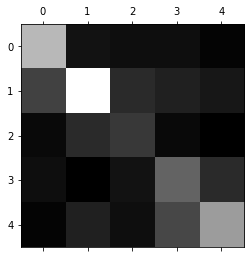

In [16]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

Looking at this confusion matrix, we notice our results are not that great. It seems that the label "1" was predicted correctly with the highest accuracy, as we hinted in the beginning of this notebook. This could be due to the fact that our classes are still unbalanced (even after setting class_weight to 'balanced'). This implied that accuracy is definitely not the best metric for performance in a dataset like this. For now we will just take this into consideration and evaluate our model in a more accurate way using cross validation.

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(accuracies)


[0.57692308 0.65384615 0.54807692 0.60576923 0.63461538 0.60576923
 0.56730769 0.625      0.55769231 0.55769231]


In [18]:
print(accuracies.mean())

0.5932692307692307


Doing a 10-fold CV yields an average accuracy of 59.3%. However, since we know that we have an unbalanced dataset, we will evaluate our model using other metrics such as precision, recall and the f1 score to provide us with a more accurate representation of our model's performance.

In [19]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
precision_score(y_test, y_pred, average = "micro")

0.6115384615384616

According to the documentation, the "micro" parameter calculates metrics globally by counting the total true positives, false negatives and false positives. This takes label imbalance into account rather than using the "macro" parameter.


In [20]:
recall_score(y_test, y_pred, average = "micro")

0.6115384615384616

In [21]:
f1_score(y_test, y_pred, average = "micro") 

0.6115384615384616

In [22]:
precision_score(y_test, y_pred, average = "micro")

0.6115384615384616

Looking at our metrics, our base model's accuracy through cross validation is approximately 59.3%, with a precision, recall and f1_score of 61.2%. The reason for the same precision, recall and f1 scores is because we used the micro averaging scheme and thus the number of false positives always equals the number of false negatives in this case. Since micro averaging does not distinguish between different classes and then just averages their metric scores, this averaging scheme is not prone to inaccurate values due to an unequally distributed test set (e.g. class '1' in our case which contains the majority of the samples). This is why we prefer this scheme over the macro averaging scheme. Besides micro averaging, one might also consider weighted averaging in case of an unequally distributed data set. But for the purpose of this analysis, we will stick to the micro averaging scheme throughout.

## Random Forest Classifier

For now we have seen that we have a dataset that is not balanced. This caused us to modify the class weights and set class_weight as 'balanced'. However, our accuracy was still not great (even though it was lower, it was probably a more realistic representation of model accuracy had we only used default parameters). This caused us to focus our attention on other metrics, such as precision, recall and f1_score. After applying logistic regression, we notice that there is definitely room for improvement. Therefore, we progress to the next stage where we now implement the random forest classifier. We hypothesize that a random forest classifier will perform better than Logistic Regression since it is known to perform better with higher-dimensional data. We will repeat the same procedure as before and evaluate our performance using our usual metrics, taking into account unbalanced labels.

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [24]:
y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))

[[1 2]
 [1 1]
 [1 4]
 [0 0]
 [1 2]
 [1 1]
 [1 2]
 [3 4]
 [1 1]
 [4 2]
 [4 4]
 [1 2]
 [4 4]
 [1 2]
 [4 4]
 [1 3]
 [3 1]
 [1 1]
 [1 3]
 [4 4]
 [1 1]
 [4 4]
 [1 1]
 [0 0]
 [1 1]
 [4 4]
 [1 1]
 [1 1]
 [3 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [1 2]
 [1 0]
 [3 3]
 [3 3]
 [1 2]
 [1 4]
 [1 1]
 [1 4]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [3 3]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 3]
 [4 4]
 [4 3]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 3]
 [4 4]
 [1 3]
 [1 2]
 [0 0]
 [0 1]
 [4 4]
 [2 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [4 4]
 [0 1]
 [4 3]
 [4 4]
 [4 1]
 [1 1]
 [4 4]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [1 1]
 [4 3]
 [0 0]
 [1 4]
 [1 4]
 [3 4]
 [4 4]
 [1 1]
 [1 1]
 [3 3]
 [3 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [4 4]
 [4 4]
 [1 1]
 [1 1]
 [1 3]
 [1 1]
 [0 0]
 [1 4]
 [1 1]
 [3 3]
 [1 3]
 [0 4]
 [1 4]
 [4 0]
 [0 0]
 [4 4]
 [4 4]
 [4 2]
 [3 2]
 [3 0]
 [0 0]
 [0 0]
 [1 3]
 [0 0]
 [1 1]
 [1 4]
 [1 1]
 [1 1]
 [0 0]
 [3 4]
 [0 3]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [1 0]
 [0 3]
 [1 3]
 [4 4]
 [4 4]
 [1 1]

## Evaluating Model Performance

In [25]:
cm_2 = confusion_matrix(y_test, y_pred_2)
print(cm_2)

[[35 10  1  1  3]
 [ 9 72  0  4  4]
 [ 0 18  4  1  2]
 [ 4 11  0 17  5]
 [ 3 13  0  6 37]]


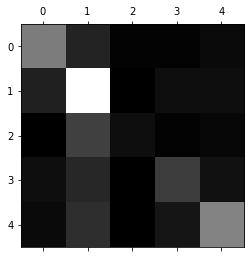

In [26]:
plt.matshow(cm_2, cmap=plt.cm.gray)
plt.show()

We can see by the confusion matrix that the class of '1' still dominates the other classes. While this does look similar to our logistic regression classfier, we will only know for sure after evaluating our performance through cross validation.

In [27]:
accuracies_2 = cross_val_score(estimator = classifier_2, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print(accuracies_2)

[0.625      0.64423077 0.57692308 0.65384615 0.70192308 0.69230769
 0.65384615 0.66346154 0.63461538 0.61538462]


In [28]:
print(accuracies_2.mean()) #Higher accuracy than the Logistic Regression Classifier

0.6461538461538462


In [29]:
f1_score(y_test, y_pred_2, average = "micro")

0.6346153846153846

In [30]:
precision_score(y_test, y_pred_2, average = "micro")


0.6346153846153846

In [31]:
recall_score(y_test, y_pred_2, average = "micro")

0.6346153846153846

Clearly, we have noticed that random forest performs better than logistic regression, with a higher accuracy of 64.6% and more importantly,  higher precision, recall and f1 scores of 63.46% compared to Logistic regression. This leads to a conclusion that random forest performs better than logistic regression on this dataset! However, there is still room for improvement. So we will apply grid search to fine tune our hyperparameters and conclude which is the best model with the best parameters. 

## Fine Tuning Hyperparameters

Since we have already noticed that accuracy is not the best measure, we will turn our focus on optimizing the f1 score instead, since it takes both precision and recall into account. We have already seen that random forest performs better than logistic regression. Thus we will only tune the hyperparameters of the random forest in order to reduce computational time.

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 50, 200, 300]
}]
grid_search_2 = GridSearchCV(estimator = classifier_2, param_grid = param_grid, scoring = "f1_micro", n_jobs = -1)
grid_search_2 = grid_search_2.fit(X_train, y_train)  
best_score_f1 = grid_search_2.best_score_

In [33]:
print(best_score_f1)

0.6730769230769231


In [34]:
best_parameters = grid_search_2.best_params_
print(best_parameters)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}


We can see that fine-tuning our hyperparamters results in higher f1_score! Thus we can assert that the best model between the two classifiers is 
a random forest classifier with parameters {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}.
However, our analysis is not over yet. We now ask ourselves if there is even a better way to optimize our models? We will focus on that in the penultimate section.

## Using SMOTE to mitigate the effects of unbalanced classes

We have seen that the random forest classifier performs better than Logistic Regression. But how can we further improve our model?
After evaluating other options, we will turn to re-sampling our data, and use SMOTE, or Synthetic Minority Over-Sampling Technique, which is an oversampling technique designed to increase the samples of the minority class. This approach is effective because new synthetic examples from the minority class are created that are plausible, that is, that are relatively close in the feature space to existing examples from the minority class. We will first import SMOTE from the imblearn.over_sampling library and perform the usual steps and compare the final results on the new set of data.

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state=27)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) #It's important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

#Let's now fit our classifiers over our updated dataset!

Using TensorFlow backend.
/Users/aryan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aryan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aryan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aryan/opt/anaconda3/lib/python3.7/sit

In [36]:
assert len(X_train_smote) !=  len(X_train)
assert len(y_train_smote) != len(y_train) #confirming that we have a resampled dataset with synthetic values

In [37]:
smote_lr = LogisticRegression(random_state = 0, multi_class='ovr', class_weight = 'balanced').fit(X_train_smote, y_train_smote)
smote_pred_lr = smote_lr.predict(X_test)


In [38]:
cm_slr = confusion_matrix(y_test, smote_pred_lr)


In [39]:
print(cm_slr)

[[38  4  3  3  2]
 [14 41 21  8  5]
 [ 1  7 15  2  0]
 [ 5  1  3 20  8]
 [ 1  6  5 15 32]]


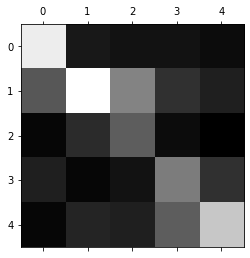

In [40]:
plt.matshow(cm_slr, cmap=plt.cm.gray)
plt.show()

We notice our confusion matrix looks a lot better after applying SMOTE. The predictions look a lot more balanced, with the correct predictions not only dominated by the 1's. This is because our dataset is now a lot more balanced in terms of the weights of the classes. We can now use accuracy as a metric with more confidence this time.

In [41]:
accuracies_slr = cross_val_score(estimator = smote_lr, X = X_train_smote, y = y_train_smote, cv = 10, n_jobs = -1)
print(accuracies_slr)

[0.62162162 0.59459459 0.56756757 0.6        0.64864865 0.6576087
 0.67391304 0.74456522 0.67391304 0.69021739]


In [42]:
accuracies_slr.mean()

0.647264982373678

In [43]:
precision_score(y_test, smote_pred_lr, average = "micro")

0.5615384615384615

In [44]:
recall_score(y_test, smote_pred_lr , average = "micro")

0.5615384615384615

In [45]:
f1_score(y_test, smote_pred_lr , average = "micro")

0.5615384615384615

Comparing our accuracy with the original logistic regression model, we notice an improvement in the average accuracy after cross validation from 59.3% to 64.7%. However, our precision, recall and f1 scores have taken a hit and now reduced from 61.2% to 56.15%.
We will now see how our random forest classifier performs under this updated dataset.

In [46]:
smote_rf = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0).fit(X_train_smote, y_train_smote)
smote_pred_rf = smote_rf.predict(X_test)

In [47]:
cm_rfc = confusion_matrix(y_test, smote_pred_rf)
print(cm_rfc)


[[34  7  2  4  3]
 [12 62  8  4  3]
 [ 1 16  6  2  0]
 [ 3  3  1 21  9]
 [ 3 10  0 11 35]]


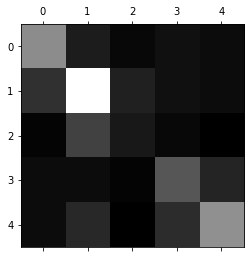

In [48]:
plt.matshow(cm_rfc, cmap=plt.cm.gray)
plt.show()

In [49]:
accuracies_rfc = cross_val_score(estimator = smote_rf, X = X_train_smote, y = y_train_smote, cv = 10, n_jobs = -1)
print(accuracies_rfc )


[0.77297297 0.75675676 0.71891892 0.80540541 0.83243243 0.84782609
 0.875      0.90217391 0.9076087  0.85326087]


In [50]:
accuracies_rfc.mean()


0.8272356051703877

In [51]:
precision_score(y_test, smote_pred_rf, average = "micro")


0.6076923076923076

In [52]:
recall_score(y_test, smote_pred_rf , average = "micro")

0.6076923076923076

In [53]:
f1_score(y_test, smote_pred_rf , average = "micro")

0.6076923076923076

When comparing our classifiers with the updated dataset, it is evident that random forest performs much better than logistical regression! We recorded an accuracy of 82.7% this time which is higher than the SMOTE logistic regression classifier (64.7%). We also recorded a higher f1_score of 60.8% than the logistic classifier (even though when comparing with the fine-tuned parameters of the original random forest model, it is lower). We can now even fine tune our hyper parameters for the random forest model based on accuracy as our scoring criteria with more confidence to once and for all, determine the most optimal model and its set of parameters. 

In [54]:
grid_search_3 = GridSearchCV(estimator = smote_rf, param_grid = param_grid, scoring = "accuracy", n_jobs = -1)
grid_search_3 = grid_search_3.fit(X_train_smote, y_train_smote)  
best_accuracy_smote = grid_search_3.best_score_

In [55]:
print(best_accuracy_smote)

0.8471544715447153


In [56]:
best_parameters_smote = grid_search_3.best_params_
print(best_parameters_smote)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


We can now see that this is definitely the highest accuracy we have recorded so far - 84.7%.

## Conclusions

Although we may have recorded overall higher accuracies under random forest with SMOTE, the model is obviously far from perfect. There is still a lot of room for improvement and other factors may still need to be considered when analyzing the data. As with many other machine learning projects, there might be other factors that may have been overlooked, some of them which may be beyond the scope of this project. Nevertheless, we can safely conclude that between the two algorithms, random forest performs better. Before applying SMOTE, we noted an imbalance in the weights of the classes and used the sklearn implementation of balanced class weights (for logistic regression), along with generally focusing more on using other metrics such as precision, recall and f1_score to better evaluate our model as accuracy is no longer a very viable metric under such circumstances. Under these metrics, we concluded that a random forest with the following parameters:

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}

is indeed the best model when evaluating in terms of f1_scores (with an f1_score of 67.3%). However, we decided that we can still improve the model and evaluate in terms of accuracy by re-sampling our data, in particular by over-sampling our minority classes. This resulted in higher accuracies for both logistic regression and random forest. In particular, random forest, again perfomed better than logistic regression in terms of accuracy, precision, recall and f1_scores! However, even though re-sampling the data resulted in higher accuraces for both models, it resulted in lower f1_scores, precision and recall, albeit not by much as they were still above 50% for all models. Nevertheless, after fine-tuning our hyperparameters through GridSearchCV, we ended up with an accuracy of 84.7%!

So to conclude, what is the best model in terms of the highest accuracy? The best model is the random forest classifier with the parameters found after performing grid search on the 'SMOTE'd' training set! This model resulted in an 84.7% accuracy with the following best parameters:

## {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}







